In [322]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [323]:
nflx = pd.read_csv("NFLX_2.csv")
nflx
close_prices = nflx['Close']
dates = nflx['Date']
plt.plot(dates, close_prices)

,Date,Open,High,Low,Close,Volume,SMA30,SMA8,EMA50,EMA12,K,D,RSI,Month,Year,Day,Day_Name
0,2018-03-19,315.799988,317.000000,307.339996,313.480011,9925200,291.264666,320.023750,299.206963,314.170719,59.605911,67.868628,62.913629,3,2018,19,1
1,2018-03-20,313.260010,319.500000,312.799988,317.500000,5991900,293.372666,320.086250,300.216405,314.685819,67.527072,65.510667,64.226588,3,2018,20,2
2,2018-03-21,316.350006,319.399994,314.510010,316.480011,5263900,295.064667,318.216251,301.099756,314.963171,65.517241,64.216742,64.205607,3,2018,21,3
3,2018-03-22,313.070007,314.119995,305.660004,306.700012,8063300,296.469334,316.391254,301.399407,313.686766,25.013757,52.686023,53.106117,3,2018,22,4
4,2018-03-23,307.410004,309.369995,300.359985,300.940002,9529900,298.164000,314.523754,301.375172,311.719007,1.725213,30.752070,41.505554,3,2018,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,2022-01-31,401.970001,427.700012,398.200012,427.140015,20047500,527.323000,402.152504,539.286213,435.893139,39.251083,24.587551,29.680923,1,2022,31,1
976,2022-02-01,432.959991,458.480011,425.540009,457.130005,22542300,523.003001,395.762504,536.064401,439.160349,54.805248,37.039918,36.337520,2,2022,1,2
977,2022-02-02,448.250000,451.980011,426.480011,429.480011,14346000,517.527668,399.760006,531.884621,437.671066,41.208485,45.088272,33.694538,2,2022,2,3
978,2022-02-03,421.440002,429.260010,404.279999,405.600006,9905200,510.883669,402.066257,526.932283,432.737057,28.965820,41.659851,33.107304,2,2022,3,4


In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

nflx = nflx[['Date','Close']]
nflx

,Date,Close
0,2018-03-19,313.480011
1,2018-03-20,317.500000
2,2018-03-21,316.480011
3,2018-03-22,306.700012
4,2018-03-23,300.940002
...,...,...
975,2022-01-31,427.140015
976,2022-02-01,457.130005
977,2022-02-02,429.480011
978,2022-02-03,405.600006


In [325]:
device ='cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [326]:
from copy import deepcopy as dc

def prepare_dataframe_fro_lstm(df,n_steps):
    df = dc(df)
    df.set_index('Date',inplace = True)
    for i in range(1,n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace = True)
    return df

lookback = 7
nflx = prepare_dataframe_fro_lstm(nflx,lookback)
nflx

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,
2018-03-28,285.769989,300.690002,320.350006,300.940002,306.700012,316.480011,317.500000,313.480011
2018-03-29,295.350006,285.769989,300.690002,320.350006,300.940002,306.700012,316.480011,317.500000
2018-04-02,280.290009,295.350006,285.769989,300.690002,320.350006,300.940002,306.700012,316.480011
2018-04-03,283.670013,280.290009,295.350006,285.769989,300.690002,320.350006,300.940002,306.700012
2018-04-04,288.940002,283.670013,280.290009,295.350006,285.769989,300.690002,320.350006,300.940002
...,...,...,...,...,...,...,...,...
2022-01-31,427.140015,384.359985,386.700012,359.700012,366.420013,387.149994,397.500000,508.250000
2022-02-01,457.130005,427.140015,384.359985,386.700012,359.700012,366.420013,387.149994,397.500000
2022-02-02,429.480011,457.130005,427.140015,384.359985,386.700012,359.700012,366.420013,387.149994


In [327]:
nflx_mtx = nflx.to_numpy()
nflx_mtx

array([[285.769989, 300.690002, 320.350006, ..., 316.480011, 317.5     ,
        313.480011],
       [295.350006, 285.769989, 300.690002, ..., 306.700012, 316.480011,
        317.5     ],
       [280.290009, 295.350006, 285.769989, ..., 300.940002, 306.700012,
        316.480011],
       ...,
       [429.480011, 457.130005, 427.140015, ..., 359.700012, 366.420013,
        387.149994],
       [405.600006, 429.480011, 457.130005, ..., 386.700012, 359.700012,
        366.420013],
       [410.170013, 405.600006, 429.480011, ..., 384.359985, 386.700012,
        359.700012]])

In [328]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(-1,1))
nflx_mtx = scaler.fit_transform(nflx_mtx)

nflx_mtx

array([[-0.77331214, -0.70813221, -0.62224503, ..., -0.63915158,
        -0.63469564, -0.65225746],
       [-0.73146064, -0.77331214, -0.70813221, ..., -0.68187673,
        -0.63915158, -0.63469564],
       [-0.79725212, -0.73146064, -0.77331214, ..., -0.70704005,
        -0.68187673, -0.63915158],
       ...,
       [-0.14549701, -0.02470457, -0.15571957, ..., -0.45033963,
        -0.42098246, -0.33042096],
       [-0.24981978, -0.14549701, -0.02470457, ..., -0.33238676,
        -0.45033963, -0.42098246],
       [-0.22985514, -0.24981978, -0.14549701, ..., -0.34260946,
        -0.33238676, -0.45033963]])

In [329]:
X = nflx_mtx[:,1:]
y = nflx_mtx[:,0]

X.shape, y.shape

((973, 7), (973,))

In [330]:
X = dc(np.flip(X,axis=1))
X

array([[-0.65225746, -0.63469564, -0.63915158, ..., -0.70704005,
        -0.62224503, -0.70813221],
       [-0.63469564, -0.63915158, -0.68187673, ..., -0.62224503,
        -0.70813221, -0.77331214],
       [-0.63915158, -0.68187673, -0.70704005, ..., -0.70813221,
        -0.77331214, -0.73146064],
       ...,
       [-0.33042096, -0.42098246, -0.45033963, ..., -0.34260946,
        -0.15571957, -0.02470457],
       [-0.42098246, -0.45033963, -0.33238676, ..., -0.15571957,
        -0.02470457, -0.14549701],
       [-0.45033963, -0.33238676, -0.34260946, ..., -0.02470457,
        -0.14549701, -0.24981978]])

In [331]:
split_index = int(len(X)*0.95)

split_index

924

In [332]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((924, 7), (49, 7), (924,), (49,))

In [333]:
num_columns = X_train.shape[1]

X_train = X_train.reshape((-1,num_columns,1))
X_test = X_test.reshape(-1,num_columns,1)

y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((924, 7, 1), (49, 7, 1), (924, 1), (49, 1))

In [334]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

(torch.Size([924, 7, 1]),
 torch.Size([49, 7, 1]),
 torch.Size([924, 1]),
 torch.Size([49, 1]))

In [335]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self,i):
        return self.X[i], self.y[i]
    
train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [336]:
from torch.utils.data import DataLoader

batch_size = 16
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=False)

In [337]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, 
                            batch_first=True)
        
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 1, batch_first=True)
  (fc): Linear(in_features=1, out_features=1, bias=True)
)

In [338]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0
    
    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [339]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0
    
    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)
    
    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

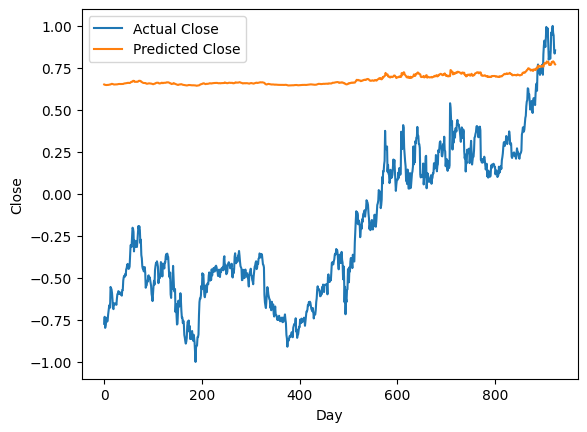

In [340]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()
